# S I R Model used for disease outbreak

This project will look at the basic of S I R model and how it is used for disease outbreak. Whilst this model can be used for COVID 19, it is not clear if an individual is immune from the disease once they have caught it one. We will assume that this is the case. 

In [63]:
#Import Packages

import scipy

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
#set variables
#Set population value
population = 500

Initial_infected, Initial_recovered = 1,0

Initial_everyone_else = population - Initial_infected - Initial_recovered

Initial_conditions = Initial_everyone_else, Initial_infected, Initial_recovered

In [30]:
n_days = 500

time = np.linspace(0,n_days, n_days)

In [114]:
contact_rate = 0.25
recovery_rate = 1/14

def SIR(Initial_conditions, t, population, contact_rate, recovery_rate):
    S, I, R = Initial_conditions
    ds = -contact_rate * S * I/population
    dI = contact_rate * S * I/population - recovery_rate * I
    dR = recovery_rate * I
    return ds, dI, dR


In [123]:
result = odeint(SIR, Initial_conditions, time, args=(population, contact_rate, recovery_rate))

S, I, R = result.T

In [124]:
def rowIndex(row):
    return row.name

In [141]:
#Create daterange df from 24th March 2020 - Start of Lockdown UK
rng = pd.date_range('2020-03-24', periods=500, freq='D')

#convert range to dataframe
Data_Initial = pd.DataFrame(rng)
Data_Initial['Days'] = Data_Initial.apply(rowIndex,axis=1)
Data_Initial['Susceptible'] = Data_Initial.apply(lambda x: S[x.Days],axis=1)
Data_Initial['Infection'] = Data_Initial.apply(lambda x: I[x.Days],axis=1)
Data_Initial['Recovered'] = Data_Initial.apply(lambda x: R[x.Days],axis=1)

In [142]:
#Inspect the table
Data_Initial.head(10)

,0,Days,Susceptible,Infection,Recovered
0,2020-03-24,0,499.000000,1.000000,0.000000
1,2020-03-25,1,498.726390,1.195258,0.078352
2,2020-03-26,2,498.399577,1.428427,0.171997
3,2020-03-27,3,498.009325,1.706776,0.283899
4,2020-03-28,4,497.543478,2.038929,0.417593
5,2020-03-29,5,496.987615,2.435101,0.577284
6,2020-03-30,6,496.324660,2.907365,0.767975
7,2020-03-31,7,495.534433,3.469959,0.995608
8,2020-04-01,8,494.593142,4.139628,1.267229
9,2020-04-02,9,493.472819,4.935993,1.591188


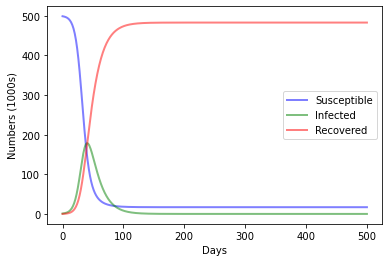

In [143]:
#Create a graph to view the rate of change for each group
fig = plt.figure(facecolor ="w")
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(time, S, 'b', alpha=0.5, lw=2, label="Susceptible")
ax.plot(time, I, 'g', alpha=0.5, lw=2, label="Infected")
ax.plot(time, R, 'r', alpha=0.5, lw=2, label="Recovered")
ax.set_xlabel("Days")
ax.set_ylabel("Numbers (1000s)")
legend = ax.legend()

We observe that the peak will appear around day 50 afterwhich we will slowly move away from the peak. The disease seems to flatten from day 120 onwards.

## What happens when you reduce the contact rate

In [144]:
contact_rate = 0.15

In [146]:
result_reduced_contact = odeint(SIR, Initial_conditions, time, args=(population, contact_rate, recovery_rate))

S_reduced, I_reduced, R_reduced = result_reduced_contact.T

In [154]:
Data_Initial['Susceptible_reduced'] = Data_Initial.apply(lambda x: S_reduced[x.Days],axis=1)
Data_Initial['Infection_reduced'] = Data_Initial.apply(lambda x: I_reduced[x.Days],axis=1)
Data_Initial['Recovered_reduced'] = Data_Initial.apply(lambda x: R_reduced[x.Days],axis=1)

#Difference between the reduction of infection
Data_Initial['Susceptible_%'] = (Data_Initial['Susceptible_reduced'] - Data_Initial['Susceptible']) / Data_Initial['Susceptible'] *100
Data_Initial['Infection_%'] = (Data_Initial['Infection_reduced'] - Data_Initial['Infection']) / Data_Initial['Infection'] *100
Data_Initial['Recovered_%'] = (Data_Initial['Recovered_reduced'] - Data_Initial['Recovered']) / Data_Initial['Recovered'] *100

In [157]:
Data_Initial.head(150)

,0,Days,Susceptible,Infection,Recovered,Susceptible_reduced,Infection_reduced,Recovered_reduced,Susceptible_%,Infection_%,Recovered_%
0,2020-03-24,0,499.000000,1.000000,0.000000,499.000000,1.000000,0.000000,0.000000,0.000000,NaN
1,2020-03-25,1,498.726390,1.195258,0.078352,498.843987,1.081561,0.074453,0.023579,-9.512334,-4.977349
2,2020-03-26,2,498.399577,1.428427,0.171997,498.675308,1.169717,0.154976,0.055323,-18.111534,-9.896233
3,2020-03-27,3,498.009325,1.706776,0.283899,498.492949,1.264991,0.242060,0.097111,-25.884167,-14.737456
4,2020-03-28,4,497.543478,2.038929,0.417593,498.295818,1.367948,0.336234,0.151211,-32.908517,-19.482825
...,...,...,...,...,...,...,...,...,...,...,...
145,2020-08-16,145,17.033524,0.477512,482.488964,95.738116,11.169127,393.092757,462.057012,2239.023925,-18.528135
146,2020-08-17,146,17.029575,0.448340,482.522085,95.423982,10.700743,393.875275,460.342701,2286.749251,-18.371555
147,2020-08-18,147,17.025869,0.420948,482.553183,95.124002,10.251054,394.624944,458.702785,2335.228298,-18.221461
148,2020-08-19,148,17.022389,0.395230,482.582381,94.837525,9.819398,395.343077,457.134046,2384.477543,-18.077598


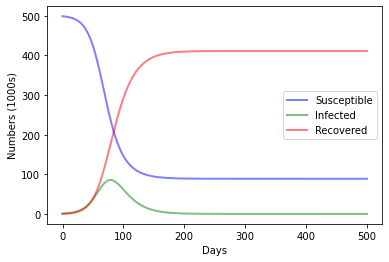

In [158]:
fig = plt.figure(facecolor ="w")
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(time, S_reduced, 'b', alpha=0.5, lw=2, label="Susceptible")
ax.plot(time, I_reduced, 'g', alpha=0.5, lw=2, label="Infected")
ax.plot(time, R_reduced, 'r', alpha=0.5, lw=2, label="Recovered")
ax.set_xlabel("Days")
ax.set_ylabel("Numbers (1000s)")
legend = ax.legend()